set path because otherwise it does not find price_simulator packages

In [3]:
import os
import sys

# Determine the project root directory (adjust the path as necessary)
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../../..'))
print(project_root)
sys.path.append(project_root)

#Economic Environment
from price_simulator.src.algorithm.demand import MarketDemandStrategy, LogitDemand, PrisonersDilemmaDemand
from price_simulator.src.algorithm.environment import DiscreteSynchronEnvironment
#RL Environment
from price_simulator.src.algorithm.policies import EpsilonGreedy, ExplorationStrategy, DecreasingEpsilonGreedy
from price_simulator.src.algorithm.agents.simple import AgentStrategy, AlwaysDefectAgent, AlwaysMaxAgent
from price_simulator.src.algorithm.agents.tabular import Qlearning
from price_simulator.src.algorithm.agents.approximate import DiffDQN
from price_simulator.src.algorithm.agents.lstm_agent import LSTMReplayAgent
#Analyiser
import price_simulator.src.utils.analyzer as Analyzer
import price_simulator.src.utils.visualizer as Visualizer

c:\Users\Thomas Gausmann\sciebo - Gausmann, Thomas (t_gaus04@uni-muenster.de)@uni-muenster.sciebo.de\Masterarbeit\price_simulator


Period 0/1000
Period 100/1000
Period 200/1000
Period 300/1000
Period 400/1000
Period 500/1000
Period 600/1000
Period 700/1000
Period 800/1000
Period 900/1000
Agent                                                                                                  Average Price    Nash Price    Monopoly Price    Average Profit Gain    Nash Profit    Monopoly Profit
---------------------------------------------------------------------------------------------------  ---------------  ------------  ----------------  ---------------------  -------------  -----------------
LSTMReplayAgent (gamma: 0.95, alpha: 0.001, policy: DecreasingEpsilonGreedy, quality: 2.0, mc: 1.0)          1.65327       1.47293           1.92498               1.72365        0.222927            0.33749
AlwaysMaxAgent                                                                                               1.97019       1.47293           1.92498              -0.380874       0.222927            0.33749


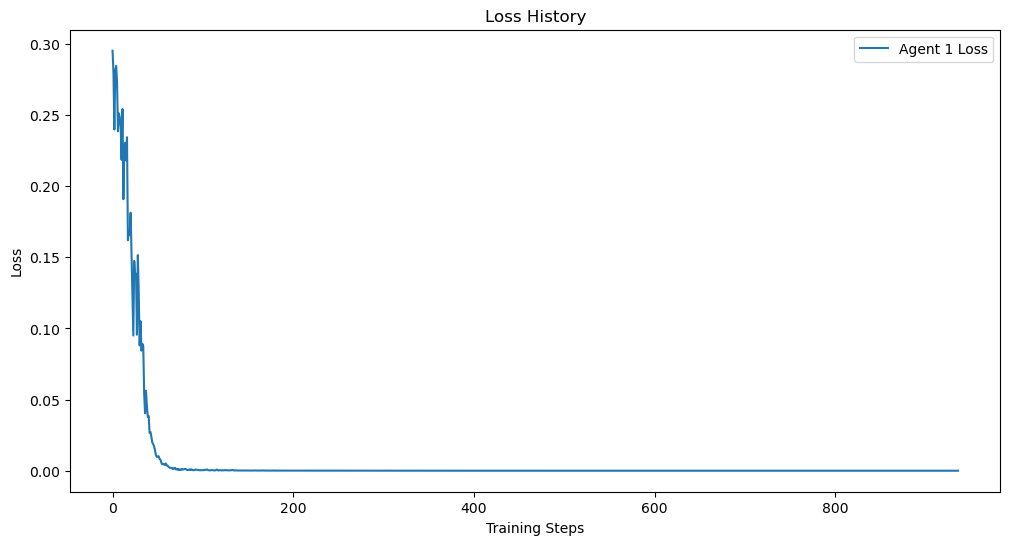

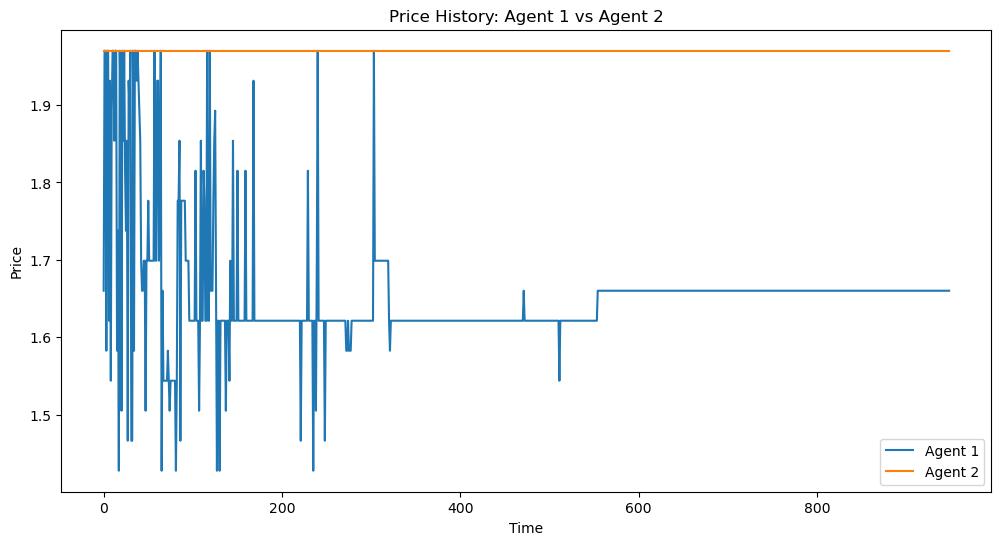

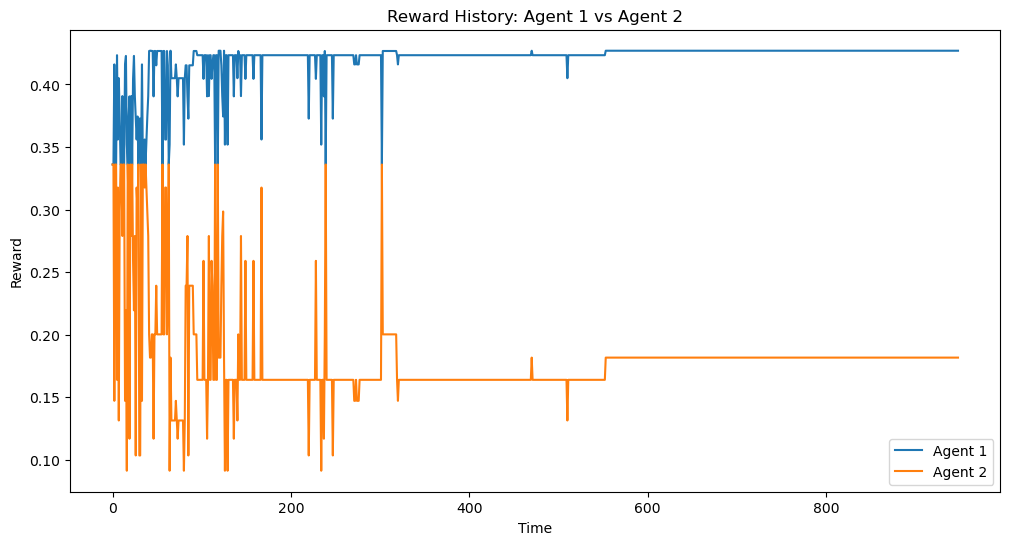

In [6]:
def run():
    env = DiscreteSynchronEnvironment(
        markup=0.1,
        n_periods=1000,
        possible_prices=[],
        n_prices=15,
        demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
        history_after=50,
        agents=[
			LSTMReplayAgent(
				discount=0.95,
				learning_rate=0.001,
				decision=DecreasingEpsilonGreedy(),
				marginal_cost=1.0,
				quality=2.0,
				sequence_length=5,
				batch_size=64,
				use_soft_update=True,
				TAU=0.001,
				debug=False,
				replay_buffer_capacity=200,
			),
            AlwaysMaxAgent(),
        ],
    )
    env.play_game()
    Analyzer.analyze(env)
    Visualizer.visualize_results(env)

run()